## ------------------------------------------Lead Score - Case Study--------------------------------------------------
### Murlidhar Maindargikar (muralimech12345@gmail.com) 
### Aditya Kumar Soni (sonaditya@gmail.com)

### Batch - PGDDS Feb 2020

### Leads.csv

# --------------------------Data Import, Check and Clean------------------------------------------

## 1. Importing required libraries

In [775]:
## Suppress Warnngs
import warnings
warnings.filterwarnings("ignore")

# Basic Python libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Basic common Modeling libraries
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Logistic Regression libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve


In [776]:
# Setting up max display value for columns
pd.set_option('display.max_columns', 125)
pd.set_option('display.max_rows', 125)

## 2. Reading and Inspection of Data

In [777]:
# Reading the data
lead_df = pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [778]:
print('Lead dataset has ', lead_df.shape[0],' rows and ', lead_df.shape[1],' columns')

Lead dataset has  9240  rows and  37  columns


In [779]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## 3. Checking the null value percentage and removing columns with higher null values

In [780]:
# To check null value percentage in ech column
print(round(100*lead_df.isnull().sum()/len(lead_df),2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Removing columns with Null value percentage greater than 40%

In [781]:
# Identifying columns with null values with greater than 40%
col1 = list(lead_df.columns.where(lead_df.isnull().sum()/len(lead_df)>0.4).dropna())
col1

['Lead Quality',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [782]:
# Dropping the columns with null values greater than 40%
lead_df = lead_df.drop(col1, axis = 1)
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Select,Mumbai,No,No,Modified


## 4. Checking columns containing 'Select' values and treating the same

In [783]:
# Identifying the columns which contains 'Select' value
col_Select = []

for i in lead_df.columns:
    if 'Select' in set(lead_df[i]):
        col_Select.append(i)
        
col_Select

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

In [784]:
# Calculating the percentage of 'Select' values in above columns
for i in col_Select:
    df = lead_df[lead_df[i] == 'Select']
    print('% of "select" values in columns',i,':',round(100*len(df)/len(lead_df),2),"%")

% of "select" values in columns Specialization : 21.02 %
% of "select" values in columns How did you hear about X Education : 54.58 %
% of "select" values in columns Lead Profile : 44.87 %
% of "select" values in columns City : 24.34 %


#### Treating 'Select' values in the columns mentioned in col_Select list

In [785]:
# Specialization
print('For the variable "Specialization" unique values are: \n',lead_df['Specialization'].unique())
print('\nConclusion: looking at the unique values, it appears that all "Select"  are corresponding to the case where \nSpecialization was either not selected by user or he/she did not get an option that was suitable for his/her case.\nWe can replace all "Select" values with "Other Specialization" in this case. This seems to be the most suitable data here"')
# Replacing 'Select' with 'Other Specialization' in Specialization column
lead_df.loc[lead_df['Specialization'] == "Select", 'Specialization'] = "Other Specialization"
print("---------------------------------------------------------------------------------------------------------------------")
# How did you hear about X Education
print('For the varibale "How did you hear about X Education" unique values are: \n',lead_df['How did you hear about X Education'].unique())
print('\nConclusion: looking at the unique values, it appears that all "Select"  are corresponding to the case where \neither the data was not selected by user or he/she did not get an option that was suitable for his/her case.\nWe can replace all "Select" values with "Other" in this case. This seems to be the most suitable data here"')
# Replacing 'Select' with 'Other'
lead_df.loc[lead_df['How did you hear about X Education'] == "Select", 'How did you hear about X Education'] = "Other"
print("---------------------------------------------------------------------------------------------------------------------")
# Lead Profile
print('For the variable "Lead Profile" unique values are: \n',lead_df['Lead Profile'].unique())
print('\nConclusion: looking at the unique values, it appears that all "Select"  are corresponding to the case where\nlead profile could not be assigned, may be because appropriate mapping is not available in option while filling the form.\nWe can replace all "Select" values with "Other Leads in this case" ')
# Reeplacing 'Select' with 'Other Leads'
lead_df.loc[lead_df['Lead Profile'] == "Select", 'Lead Profile'] = "Other Leads"
print("---------------------------------------------------------------------------------------------------------------------")
# City
print('For the variable "City" unique values are: \n',lead_df['City'].unique())
print('\nConclusion: looking at the unique values, it appears that all "Select"  are corresponding to the case where \nCity could not be assigned, may be because user has not selected it while filling the form. \nWe can replace all "Select" values with "Other Cities" in this case. This seems to be the most suitable data here"')
# Reeplacing 'Select' with 'Other Cities'
lead_df.loc[lead_df['City'] == "Select", 'City'] = "Other Cities"

For the variable "Specialization" unique values are: 
 ['Select' 'Business Administration' 'Media and Advertising' nan
 'Supply Chain Management' 'IT Projects Management' 'Finance Management'
 'Travel and Tourism' 'Human Resource Management' 'Marketing Management'
 'Banking, Investment And Insurance' 'International Business' 'E-COMMERCE'
 'Operations Management' 'Retail Management' 'Services Excellence'
 'Hospitality Management' 'Rural and Agribusiness' 'Healthcare Management'
 'E-Business']

Conclusion: looking at the unique values, it appears that all "Select"  are corresponding to the case where 
Specialization was either not selected by user or he/she did not get an option that was suitable for his/her case.
We can replace all "Select" values with "Other Specialization" in this case. This seems to be the most suitable data here"
---------------------------------------------------------------------------------------------------------------------
For the varibale "How did you hear ab

In [786]:
for i in col_Select:
    df1 = lead_df[lead_df[i] == 'Select']
    print('% of "select" values in columns',i,':',round(100*len(df1)/len(lead_df),2),"%")

% of "select" values in columns Specialization : 0.0 %
% of "select" values in columns How did you hear about X Education : 0.0 %
% of "select" values in columns Lead Profile : 0.0 %
% of "select" values in columns City : 0.0 %


##  5. Imputing missing values for columns where null percentage is less than 40%

In [787]:
print(round(100*lead_df.isnull().sum()/len(lead_df),2))

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

##### Lead Source 

In [788]:
#Checking the mode of column
lead_df['Lead Source'].mode()[0]

'Google'

In [789]:
# Replacing the missong values with mode for column 'Lead Source'
lead_df.loc[lead_df['Lead Source'].isnull(), 'Lead Source'] = lead_df['Lead Source'].mode()[0]

##### TotalVisits

In [790]:
print(lead_df['TotalVisits'].describe())
# Checking the median value of column TotalVisits as outlier is present in this column
lead_df['TotalVisits'].median()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64


3.0

In [791]:
# Replacing missing value with median value for column 'TotalVisits'
lead_df.loc[lead_df['TotalVisits'].isnull(), 'TotalVisits'] = lead_df['TotalVisits'].median()

##### # Page Views Per Visit

In [792]:
print(lead_df['Page Views Per Visit'].describe())
# Checking the median value of column 'Page Views Per Visit' as outlier is present in this column
lead_df['Page Views Per Visit'].median()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64


2.0

In [793]:
# Replacing missing value with median value for column 'Page Views Per Visit'
lead_df.loc[lead_df['Page Views Per Visit'].isnull(), 'Page Views Per Visit'] = lead_df['Page Views Per Visit'].median()

##### Last Activity

In [794]:
# Checking the mode of column
lead_df['Last Activity'].mode()[0]

'Email Opened'

In [795]:
# Replacing the missong values with mode for column 'Last Activity'
lead_df.loc[lead_df['Last Activity'].isnull(), 'Last Activity'] = lead_df['Last Activity'].mode()[0]

##### Country 

In [796]:
# Checking the mode of column
lead_df['Country'].mode()[0]

'India'

In [797]:
# Replacing the missong values with mode for column 'Country'
lead_df.loc[lead_df['Country'].isnull(), 'Country'] = lead_df['Country'].mode()[0]

##### Specialization

In [798]:
# Checking the mode of column
lead_df['Specialization'].mode()[0]

'Other Specialization'

In [799]:
# Replacing the missong values with mode for column 'Specialization'
lead_df.loc[lead_df['Specialization'].isnull(), 'Specialization'] = lead_df['Specialization'].mode()[0]

##### How did you hear about X Education

In [800]:
# Checking the mode of column
lead_df['How did you hear about X Education'].mode()[0]

'Other'

In [801]:
# Replacing the missong values with mode for column 'How did you hear about X Education'
lead_df.loc[lead_df['How did you hear about X Education'].isnull(), 'How did you hear about X Education'] = lead_df['How did you hear about X Education'].mode()[0]

##### What is your current occupation

In [802]:
# Checking the mode of column
lead_df['What is your current occupation'].mode()[0]

'Unemployed'

In [803]:
# Replacing the missong values with mode for column 'What is your current occupation'
lead_df.loc[lead_df['What is your current occupation'].isnull(), 'What is your current occupation'] = "Other"

##### What matters most to you in choosing a course

In [804]:
# Checking the mode of column
lead_df['What matters most to you in choosing a course'].mode()[0]

'Better Career Prospects'

In [805]:
# Replacing the missong values with mode for column 'What matters most to you in choosing a course'
lead_df.loc[lead_df['What matters most to you in choosing a course'].isnull(), 'What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].mode()[0]

##### Tags

In [806]:
# Replacing the missong values with 'Tag not marked'
lead_df.loc[lead_df['Tags'].isnull(), 'Tags'] = "Tag not marked"

##### Lead Profile

In [807]:
# Checking the mode of column
lead_df['Lead Profile'].mode()[0]

'Other Leads'

In [808]:
# Replacing the missong values with mode for column 'Lead Profile'
lead_df.loc[lead_df['Lead Profile'].isnull(), 'Lead Profile'] = lead_df['Lead Profile'].mode()[0]

##### City

In [809]:
# Checking the mode of column
lead_df['City'].mode()[0]

'Mumbai'

In [810]:
# Replacing the missong values with mode for column 'City'
lead_df.loc[lead_df['City'].isnull(), 'City'] = lead_df['City'].mode()[0]

##### Checking final percentage of null values

In [811]:
print(round(100*lead_df.isnull().sum()/len(lead_df),2))

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
How did you hear about X Education               0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                             

## 6. Checking the skewness in the dataset

In [812]:
# Checking the columns in the dataset
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

##### Lead Origin

In [813]:
# Printing the categories and counts
print(lead_df['Lead Origin'].value_counts())

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


Conclusion:Lead Origin has more or less a balanced data. We will keep this coulmn

##### Lead Source

In [814]:
# Printing the categories and counts
print(lead_df['Lead Source'].value_counts())

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
Pay per Click Ads       1
NC_EDM                  1
testone                 1
WeLearn                 1
blog                    1
welearnblog_Home        1
Name: Lead Source, dtype: int64


In [815]:
# Replacing values 'google' with 'Google'
lead_df.loc[lead_df['Lead Source'] == 'google','Lead Source'] = "Google"
print(lead_df['Lead Source'].value_counts())

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
blog                    1
welearnblog_Home        1
testone                 1
WeLearn                 1
youtubechannel          1
NC_EDM                  1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


Lead Source has balanced data but need to create new category for categories whose occurances are very less.

In [816]:
# Creatting new category 'Other_Lead_Source'
lead_df.loc[((lead_df['Lead Source'] == 'bing')|(lead_df['Lead Source'] == 'Click2call')|(lead_df['Lead Source'] == 'Live Chat')
            |(lead_df['Lead Source'] == 'Press_Release')|(lead_df['Lead Source'] == 'Social Media')|(lead_df['Lead Source'] == 'welearnblog_Home')
            |(lead_df['Lead Source'] == 'WeLearn')|(lead_df['Lead Source'] == 'NC_EDM')|(lead_df['Lead Source'] == 'Pay per Click Ads')
            |(lead_df['Lead Source'] == 'testone')|(lead_df['Lead Source'] == 'blog')|(lead_df['Lead Source'] == 'youtubechannel')),'Lead Source'] = "Other_Lead_Source"

In [817]:
# Printing the categories and counts
print(lead_df['Lead Source'].value_counts())

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Other_Lead_Source      23
Name: Lead Source, dtype: int64


Conclusion: Lead source has fairly balanced data

##### Do Not Email

In [818]:
# Printing the categories and counts
print(lead_df['Do Not Email'].value_counts())
print("\nCategory NO %age", 100*(len(lead_df[lead_df['Do Not Email'] == 'No'])/len(lead_df)))

No     8506
Yes     734
Name: Do Not Email, dtype: int64

Category NO %age 92.05627705627705


Conclusion: Variable 'Do Not Email' is a skewed variable and we will drop it

##### Do Not Call

In [819]:
# Printing the categories and counts
print(lead_df['Do Not Call'].value_counts())
print("\nCategory NO %age", 100*(len(lead_df[lead_df['Do Not Call'] == 'No'])/len(lead_df)))

No     9238
Yes       2
Name: Do Not Call, dtype: int64

Category NO %age 99.97835497835497


Conclusion: Variable 'Do Not Call' is a skewed variable and we will drop it

##### Last Activity

In [820]:
# Printing the categories and counts
print(lead_df['Last Activity'].value_counts())

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64


Last Activity has balanced data but need to create new category for categories whose occurances are very less.

In [821]:
# Creatting new category 'Other_Last_Activity'
lead_df.loc[((lead_df['Last Activity'] == 'Approached upfront')|(lead_df['Last Activity'] == 'View in browser link Clicked')|(lead_df['Last Activity'] == 'Email Received')
            |(lead_df['Last Activity'] == 'Email Marked Spam')|(lead_df['Last Activity'] == 'Visited Booth in Tradeshow')|(lead_df['Last Activity'] == 'Resubscribed to emails')
            ),'Last Activity'] = "Other_Last_Activity"

In [822]:
# Printing the categories and counts
print(lead_df['Last Activity'].value_counts())

Email Opened                 3540
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Other_Last_Activity            21
Name: Last Activity, dtype: int64


Conclusion: Last activity column has balanced data so we will keep it.

##### Country

In [823]:
# Printing the categories and counts
print(lead_df['Country'].value_counts())

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
South Africa               4
Sweden                     3
Ghana                      2
Netherlands                2
Uganda                     2
Belgium                    2
Italy                      2
Philippines                2
Bangladesh                 2
China                      2
Asia/Pacific Region        2
Kenya                      1
Liberia                    1
Malaysia                   1
Vietnam                    1
Russia                     1
Sri Lanka                  1
Tanzania      

Need to create new category for categories whose occurances are very less

In [824]:
# Creating new category 'Other countries'
lead_df.loc[((lead_df['Country'] != 'India')&(lead_df['Country'] != 'United States')&(lead_df['Country'] != 'United Arab Emirates')
            &(lead_df['Country'] != 'Singapore')&(lead_df['Country'] != 'Saudi Arabia')&(lead_df['Country'] != 'United Kingdom')
            &(lead_df['Country'] != 'Australia')), 'Country'] = "Other_Countries"

In [825]:
# Printing the categories and counts
print(lead_df['Country'].value_counts())

India                   8953
Other_Countries           92
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Name: Country, dtype: int64


Conclusion: Data in coulmn countries is highly skewed so we will drop this coulmn.

##### Specialization

In [826]:
# Printing the categories and counts
print(lead_df['Specialization'].value_counts())

Other Specialization                 3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


Conclusion: Data in Specialization column is balanced so we will keep it.

##### How did you hear about X Education

In [827]:
# Printing the categories and counts
print(lead_df['How did you hear about X Education'].value_counts())

Other                    7436
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64


Conclusion: Data in column 'How did you hear about X Education' looks ok and it is not highly imbalanced

##### What is your current occupation

In [828]:
# Printing the categories and counts
print(lead_df['What is your current occupation'].value_counts())

Unemployed              5600
Other                   2706
Working Professional     706
Student                  210
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


Conclusion : Though data does not look like unbalanced, this column has category Unemployed as highest after null value imputation which means more than half of the data is not available. So we will drop this column.

##### What matters most to you in choosing a course

In [829]:
# Printing the categories and counts
print(lead_df['What matters most to you in choosing a course'].value_counts())

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


Conclusion: Data in column 'What matters most to you in choosing a course' is highly skewed and we will drop this column

##### Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses

In [830]:
# Printing the categories and counts
print(lead_df['Search'].value_counts())
# Highly skewed data so we will drop it

No     9226
Yes      14
Name: Search, dtype: int64


In [831]:
# Printing the categories and counts
print(lead_df['Magazine'].value_counts())
# Highly skewed data so we will drop it

No    9240
Name: Magazine, dtype: int64


In [832]:
# Printing the categories and counts
print(lead_df['Newspaper Article'].value_counts())
# Highly skewed data so we will drop it

No     9238
Yes       2
Name: Newspaper Article, dtype: int64


In [833]:
# Printing the categories and counts
print(lead_df['X Education Forums'].value_counts())
# Highly skewed data so we will drop it

No     9239
Yes       1
Name: X Education Forums, dtype: int64


In [834]:
# Printing the categories and counts
print(lead_df['Newspaper'].value_counts())
# Highly skewed data so we will drop it

No     9239
Yes       1
Name: Newspaper, dtype: int64


In [835]:
# Printing the categories and counts
print(lead_df['Digital Advertisement'].value_counts())
# Highly skewed data so we will drop it

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


In [836]:
# Printing the categories and counts
print(lead_df['Through Recommendations'].value_counts())
# Highly skewed data so we will drop it

No     9233
Yes       7
Name: Through Recommendations, dtype: int64


In [837]:
# Printing the categories and counts
print(lead_df['Receive More Updates About Our Courses'].value_counts())
# Highly skewed data so we will drop it

No    9240
Name: Receive More Updates About Our Courses, dtype: int64


Conclusion: Data in below columns is highly skewed so we will drop these columns
1. Search, 
2. Magazine
3. Newspaper Article
4. X Education Forums
5. Newspaper
6. Digital Advertisement
7. Through Recommendations
8. Receive More Updates About Our Courses


##### Tags

In [838]:
# Printing the categories and counts
print(lead_df['Tags'].value_counts())

Tag not marked                                       3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Need to create new category for categories whose occurances are very less

In [839]:
# Creating new category 'Other_Tags'
lead_df.loc[((lead_df['Tags'] == 'Lost to Others')|(lead_df['Tags'] == 'Still Thinking')|(lead_df['Tags'] == 'Want to take admission but has financial problems')
            |(lead_df['Tags'] == 'Interested in Next batch')|(lead_df['Tags'] == 'In confusion whether part time or DLP')|(lead_df['Tags'] == 'Lateral student')
            |(lead_df['Tags'] == 'University not recognized')|(lead_df['Tags'] == 'Shall take in the next coming month')|(lead_df['Tags'] == 'Recognition issue (DEC approval)')), 'Tags'] = "Other_Tags"

In [840]:
# Printing the categories and counts
print(lead_df['Tags'].value_counts())

Tag not marked                         3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Diploma holder (Not Eligible)            63
wrong number given                       47
Other_Tags                               37
opp hangup                               33
number not provided                      27
in touch with EINS                       12
Name: Tags, dtype: int64


Conclusion: Though data does not look like unbalanced, this column has category 'Tag not marked' as highest after missing value imputation which means considerable data is not available. So we will drop this column.

##### Update me on Supply Chain Content, Get updates on DM Content

In [841]:
# Printing the categories and counts
print(lead_df['Update me on Supply Chain Content'].value_counts())
# Highly skewed data so we will drop it

No    9240
Name: Update me on Supply Chain Content, dtype: int64


In [842]:
# Printing the categories and counts
print(lead_df['Get updates on DM Content'].value_counts())
# Highly skewed data so we will drop it

No    9240
Name: Get updates on DM Content, dtype: int64


Conclusion: For below columns data is unicategorical so need to remove as it is not contribting for data analayis.
1. Update me on Supply Chain Content
2. Get updates on DM Content

##### Lead Profile

In [843]:
# Printing the categories and counts
print(lead_df['Lead Profile'].value_counts())

Other Leads                    7342
Potential Lead                 1613
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64


##### City

In [844]:
# Printing the categories and counts
print(lead_df['City'].value_counts())

Mumbai                         4642
Other Cities                   2935
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


Conclusion: Data in City column is balanced so we will keep this columns.

##### I agree to pay the amount through cheque

In [845]:
# Printing the categories and counts
print(lead_df['I agree to pay the amount through cheque'].value_counts())

No    9240
Name: I agree to pay the amount through cheque, dtype: int64


Conclusion: Data in column 'Printing the categories and counts' is unicategorical so will not contribute to data analysis so we will remove the same.

##### A free copy of Mastering The Interview

In [846]:
# Printing the categories and counts
print(lead_df['A free copy of Mastering The Interview'].value_counts())

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


Conclusion: Data in column 'A free copy of Mastering The Interview' is balanced and we will keep the same.

##### Last Notable Activity

In [847]:
# Printing the categories and counts
print(lead_df['Last Notable Activity'].value_counts())

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Resubscribed to emails             1
Email Received                     1
Form Submitted on Website          1
View in browser link Clicked       1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64


Need to create new category for categories whose occurances are very less

In [848]:
# Creating new category 'Other_Last_Notable_Activity'
lead_df.loc[((lead_df['Last Notable Activity'] == 'Email Marked Spam')|(lead_df['Last Notable Activity'] == 'Approached upfront')|(lead_df['Last Notable Activity'] == 'Resubscribed to emails')
            |(lead_df['Last Notable Activity'] == 'Form Submitted on Website')|(lead_df['Last Notable Activity'] == 'Email Received')|(lead_df['Last Notable Activity'] == 'View in browser link Clicked')
            |(lead_df['Last Notable Activity'] == 'Had a Phone Conversation')), 'Last Notable Activity'] = "Other_Last_Notable_Activity"

In [849]:
# Printing the categories and counts
print(lead_df['Last Notable Activity'].value_counts())

Modified                       3407
Email Opened                   2827
SMS Sent                       2172
Page Visited on Website         318
Olark Chat Conversation         183
Email Link Clicked              173
Email Bounced                    60
Unsubscribed                     47
Unreachable                      32
Other_Last_Notable_Activity      21
Name: Last Notable Activity, dtype: int64


Conclusion: Data in column 'Last Notable Activity' is balanced and we will keep the same

##### Below columns are highly skewed and we will drop them from dataframe

'Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine'
,'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
,'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
,'I agree to pay the amount through cheque'

In [850]:
# List of columns with highly imbalanced data
imbalanced_columns = ['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course','Search','Magazine'
                      ,'Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
                      ,'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
                      ,'I agree to pay the amount through cheque']

# Drop Columns having highly imbalanced data
lead_df = lead_df.drop(imbalanced_columns, axis = 1)

In [851]:
# Columns remained after removing columns with highly imbalanced data and high percentage of null values
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation', 'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

#### Removing columns which we think will not contribute for model building like 'Prospect ID', 'Tags', 'What is your current occupation'

##### Prospect ID - Already column 'Lead Number' is present as a unique parameter to identify lead, so we will remove this column
##### Tags - Though data does not look like unbalanced, this column has category 'Tag not marked' as highest after missing value imputation which means considerable data is not available. So we will drop this column.
##### What is your current occupation - Though data does not look like unbalanced, this column has category 'Unemployed' as highest after null value imputation which means more than half of the data is not available. So we will drop this column.

In [852]:
# Need to remove column Prospect ID as Lead Number column is already present as a unique identity of leads
lead_df = lead_df.drop(['Prospect ID','Tags','What is your current occupation'], axis = 1)

#### Checking the number of categories in categorical variables

In [853]:
lead_df_cat = ['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education','Lead Profile','City','A free copy of Mastering The Interview','Last Notable Activity']

for i in lead_df_cat:
    print("Number of categories present in column", i, "is", len(lead_df[i].value_counts()))

Number of categories present in column Lead Origin is 5
Number of categories present in column Lead Source is 9
Number of categories present in column Last Activity is 12
Number of categories present in column Specialization is 19
Number of categories present in column How did you hear about X Education is 9
Number of categories present in column Lead Profile is 5
Number of categories present in column City is 6
Number of categories present in column A free copy of Mastering The Interview is 2
Number of categories present in column Last Notable Activity is 10


## 7. Converting column values from 'Yes'/'No' to 0 and 1

#### A free copy of Mastering The Interview

In [854]:
lead_df['A free copy of Mastering The Interview'] = lead_df['A free copy of Mastering The Interview'].map({"Yes": 1, "No": 0})
lead_df['A free copy of Mastering The Interview']

0       0
1       0
2       1
3       0
4       0
       ..
9235    0
9236    1
9237    1
9238    0
9239    1
Name: A free copy of Mastering The Interview, Length: 9240, dtype: int64

# --------------------------------------Data Preparation------------------------------------------


## 8. Dummy variable creation for multicategorical variables

In [855]:
# 'Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education',
#,'Lead Profile','City','Last Notable Activity'

# Creating dummy varibales for variable Lead Origin
LO = pd.get_dummies(lead_df['Lead Origin'], prefix='LO')
LO1 = LO.drop('LO_Quick Add Form', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,LO1], axis=1)

# Creating dummy varibales for variable Lead Source
LS = pd.get_dummies(lead_df['Lead Source'], prefix='LS')
LS1 = LS.drop('LS_Other_Lead_Source', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,LS1], axis=1)

# Creating dummy varibales for variable Last Activity
LA = pd.get_dummies(lead_df['Last Activity'], prefix='LA')
LA1 = LA.drop('LA_Other_Last_Activity', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,LA1], axis=1)

# Creating dummy varibales for variable Specialization
SP = pd.get_dummies(lead_df['Specialization'], prefix='SP')
SP1 = SP.drop('SP_Services Excellence', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,SP1], axis=1)

# Creating dummy varibales for variable How did you hear about X Education
HR = pd.get_dummies(lead_df['How did you hear about X Education'], prefix='HR')
HR1 = HR.drop('HR_SMS', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,HR1], axis=1)

# Creating dummy varibales for variable Lead Profile
LP = pd.get_dummies(lead_df['Lead Profile'], prefix='LP')
LP1 = LP.drop('LP_Dual Specialization Student', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,LP1], axis=1)

# Creating dummy varibales for variable City
CT = pd.get_dummies(lead_df['City'], prefix='CT')
CT1 = CT.drop('CT_Tier II Cities', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,CT1], axis=1)

# Creating dummy varibales for variable Last Notable Activity
LNA = pd.get_dummies(lead_df['Last Notable Activity'], prefix='LNA')
LNA1 = LNA.drop('LNA_Other_Last_Notable_Activity', axis = 1)
#Adding the results to the master dataframe
lead_df = pd.concat([lead_df,LNA1], axis=1)


In [856]:
# Checking the shape of dataframe after dummy variable creation
lead_df.shape

(9240, 81)

#### Removing original columns for which dummy variables are created

In [857]:
# Removing columns for which dummy variables are created
lead_df = lead_df.drop(['Lead Origin','Lead Source','Last Activity','Specialization','How did you hear about X Education',
              'Lead Profile','City','Last Notable Activity'], axis = 1)

In [858]:
lead_df.shape

(9240, 73)

In [859]:
lead_df.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,660737,0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,660728,0,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,660727,1,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,660719,0,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,660681,1,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


## 9. Outlier analysis and Treatment for numerical variables

In [860]:
num_column = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

lead_df[num_column].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


#### TotalVisits

<Figure size 432x288 with 0 Axes>

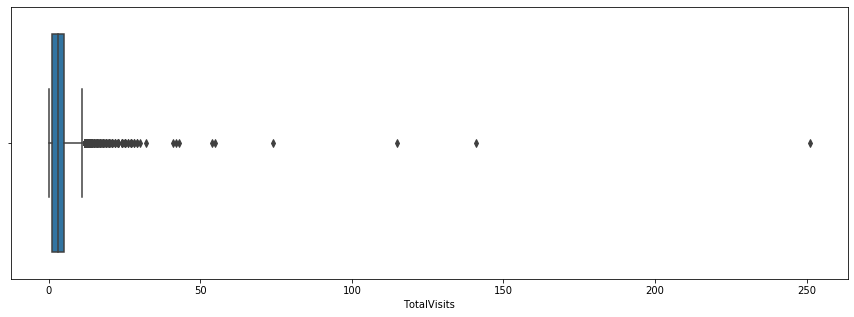

In [861]:
#Plotting Box Plots for univariate analsyis
plt.figure(1)
plt.figure(figsize=(15,5))
sns.boxplot(lead_df['TotalVisits'])
plt.show()

In [862]:
# Checking summary for rows having TotalVisits greater than 32
lead_df[lead_df['TotalVisits']>32].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.0,9.0,9.0,9.0,9.000000,9.0,9.0,9.0,9.0,9.0,9.000000,9.0,9.0,9.0,9.0,9.000000,9.0,9.0,9.0,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.000000,9.000000,9.0,9.000000,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.0,9.000000,9.0,9.0,9.000000,9.000000,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.000000,9.000000,9.0,9.0,9.000000,9.0,9.0,9.000000,9.000000,9.0,9.000000,9.000000,9.0,9.0
mean,616106.444444,0.111111,90.666667,588.111111,10.788889,0.333333,0.0,1.0,0.0,0.0,0.777778,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.0,0.777778,0.111111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.111111,0.111111,0.0,0.111111,0.0,0.0,0.333333,0.111111,0.111111,0.111111,0.0,0.222222,0.0,0.0,0.222222,0.555556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.444444,0.222222,0.0,0.0,0.333333,0.0,0.0,0.111111,0.222222,0.0,0.555556,0.111111,0.0,0.0
std,20176.287240,0.333333,69.672448,512.431323,16.939143,0.500000,0.0,0.0,0.0,0.0,0.440959,0.0,0.0,0.0,0.0,0.0,0.440959,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0,0.440959,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.0,0.333333,0.0,0.0,0.500000,0.333333,0.333333,0.333333,0.0,0.440959,0.0,0.0,0.440959,0.527046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.527046,0.440959,0.0,0.0,0.500000,0.0,0.0,0.333333,0.440959,0.0,0.527046,0.333333,0.0,0.0
min,587083.000000,0.000000,41.000000,49.000000,1.140000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
25%,606961.000000,0.000000,43.000000,187.000000,3.820000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
50%,607494.000000,0.000000,55.000000,311.000000,4.500000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.00

In [863]:
# Displaying the data having TotalVisits values greater than 32
lead_df[lead_df['TotalVisits']>32].head(9)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
1160,647818,0,43.0,57,3.91,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2190,638668,0,55.0,297,55.00,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2322,637257,0,141.0,755,6.71,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
5283,609249,0,74.0,1209,12.33,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
5530,607494,0,41.0,311,1.14,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
5538,607470,0,54.0,1280,4.50,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
5608,606961,0,115.0,187,8.21,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
6102,602958,1,251.0,49,1.48,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8230,587083,0,42.0,1148,3.82,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [864]:
# Checking summary for rows having TotalVisits less than 32
lead_df[lead_df['TotalVisits']<32].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
count,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000
mean,617191.426436,0.385699,3.350488,487.650379,2.349282,0.312568,0.387757,0.528386,0.077790,0.005959,0.274756,0.005959,0.315060,0.190141,0.125027,0.057855,0.013326,0.015385,0.046371,0.035320,0.028927,0.383315,0.012568,0.003250,0.105417,0.068581,0.297291,0.010076,0.006609,0.036620,0.043662,0.006176,0.012134,0.105742,0.017226,0.012351,0.091766,0.039545,0.019285,0.090683,0.021993,0.054496,0.365764,0.010726,0.007801,0.037703,0.021993,0.007367,0.002817,0.016468,0.087324,0.804984,0.007259,0.033586,0.037703,0.002600,0.794366,0.174756,0.026111,0.502492,0.317660,0.049512,0.041170,0.081148,0.006501,0.018743,0.306067,0.368906,0.019827,0.033911,0.235211,0.003467,0.005092
std,23410.374362,0.486786,3.394736,548.080646,2.071524,0.463565,0.487265,0.499221,0.267855,0.076967,0.446416,0.076967,0.464565,0.392433,0.330768,0.233481,0.114673,0.123084,0.210298,0.184596,0.167612,0.486220,0.111405,0.056922,0.307107,0.252753,0.457091,0.099877,0.081030,0.187836,0.204353,0.078346,0.109492,0.307524,0.130121,0.110453,0.288711,0.194898,0.137532,0.287173,0.146670,0.227007,0.481670,0.103015,0.087981,0.190488,0.146670,0.085521,0.053003,0.127274,0.282324,0.396235,0.084894,0.180171,0.190488,0.050929,0.404186,0.379779,0.159473,0.500021,0.465592,0.216947,0.198694,0.273078,0.080368,0.135624,0.460883,0.482534,0.139412,0.181010,0.424154,0.058782,0.071181
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [865]:
# Checking the variable value at 99th and 99.99th percentile
print("Value at 99th percentile is",lead_df['TotalVisits'].quantile(0.99))
print("Value at 99.99th percentile is",lead_df['TotalVisits'].quantile(0.999))

Value at 99th percentile is 17.0
Value at 99.99th percentile is 31.522000000000844


<Figure size 432x288 with 0 Axes>

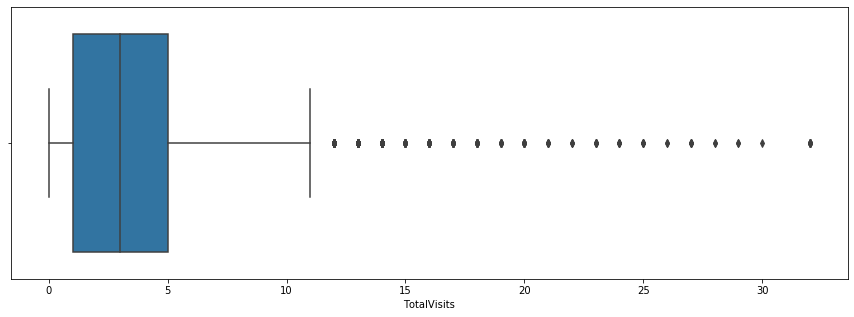

In [866]:
# Capping the values at value 32
lead_df.loc[lead_df['TotalVisits']>32, ['TotalVisits']] = 32

#Plotting Box Plotsfor univariate analsyis
plt.figure(1)
plt.figure(figsize=(15,5))
sns.boxplot(lead_df['TotalVisits'])
plt.show()


#### Conclusion: 
##### 1)	We see a range of outliers in ranging from 99th Quantile i.e. 17 TO 999th Quantile i.e.  approximately 32. This range being very continuous, we don’t need to treat them. Also from Domain perspective, number of pages visited = 32 seems like an acceptable and practical figure. However we need to further analyze the outliers above this range. 
##### 2)	For range of outliers that exist after total visits >32, are quite far from each other and also there are just 9 such outliers. These outliers are just 0.001% of total data. We have decided to cap them with total visits max value of total visits column i.e. 32


#### Total Time Spent on Website

<Figure size 432x288 with 0 Axes>

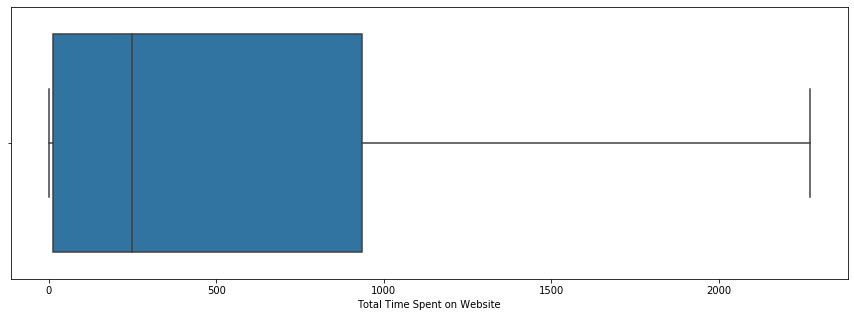

In [867]:
#Plotting Box Plots for univariate analsyis
plt.figure(1)
plt.figure(figsize=(15,5))
sns.boxplot(lead_df['Total Time Spent on Website'])
plt.show()

Column 'Total Time Spent on Website' has no otliers.

#### Page Views Per Visit

<Figure size 432x288 with 0 Axes>

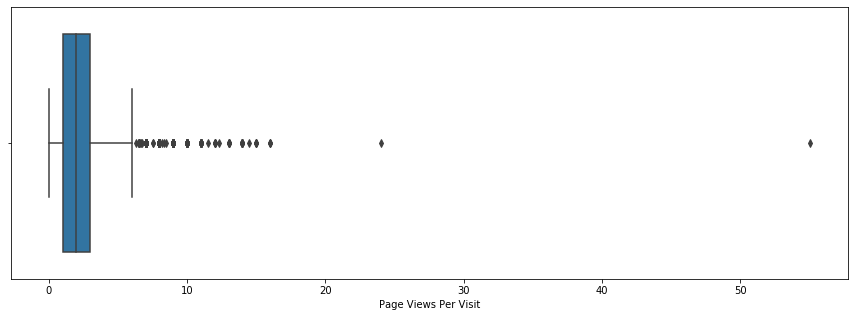

In [868]:
#Plotting Box Plots for Numerical columns for univariate analsyis
plt.figure(1)
plt.figure(figsize=(15,5))
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()


In [869]:
# Checking summary for rows having Page Views Per Visit greater than 20
lead_df[lead_df['Page Views Per Visit']>20].describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.000000,2.000000,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
mean,618123.500000,0.500000,28.000000,912.000000,39.50000,0.500000,0.500000,0.500000,0.0,0.0,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,29054.310532,0.707107,5.656854,869.741341,21.92031,0.707107,0.707107,0.707107,0.0,0.0,0.707107,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,597579.000000,0.000000,24.000000,297.000000,24.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,607851.250000,0.250000,26.000000,604.500000,31.75000,0.250000,0.250000,0.250000,0.0,0.0,0.250000,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.250000,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,618123.500000,0.500000,28.000000,912.000000,39.50000,0.500000,0.500000,0.500000,0.0,0.0,0.500000,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.500000,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,628395.750000,0.750000,30.000000,1219.500000,47.25000,0.750000,0.750000,0.750000,0.0,0.0,0.750000,0.0,0.0,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.750000,0.0,0.0,0.0,0.0,0.750000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.

In [870]:
# Displaying the data having Page Views Per Visit values greater than 20
lead_df[lead_df['Page Views Per Visit']>20].head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
2190,638668,0,32.0,297,55.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
6805,597579,1,24.0,1527,24.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


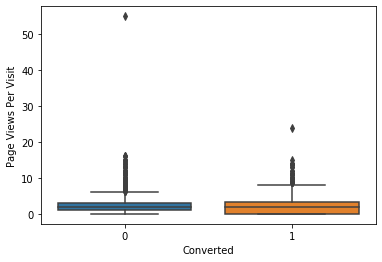

In [871]:
# Comparing data for Converted and Page Views Per Visit
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = lead_df)

In [872]:
# Checking the variable value at 99th and 99.99th percentile
print("Value at 99th percentile is",lead_df['Page Views Per Visit'].quantile(0.99))
print("Value at 99.99th percentile is",lead_df['Page Views Per Visit'].quantile(0.999))

Value at 99th percentile is 9.0
Value at 99.99th percentile is 14.380500000000211


<Figure size 432x288 with 0 Axes>

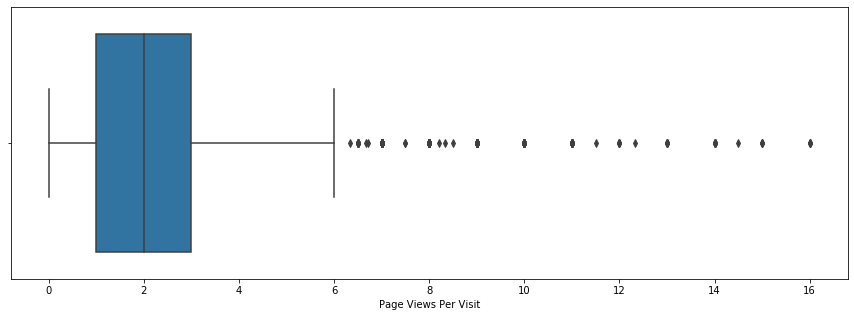

In [873]:
# Capping the values at value 16
lead_df.loc[lead_df['Page Views Per Visit']>20, ['Page Views Per Visit']] = 16

#Plotting Box Plots for Numerical columns for univariate analsyis
plt.figure(1)
plt.figure(figsize=(15,5))
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

#### Conclusion: 

#### We see that there are 2 extreme outliers in this feature. These outliers need to be definitely treated to ensure that these extreme values do not impact the model tuning and eventually causing an unstable model. 
#### Also the number of outliers are almost insignificant if we look at the total size of feature. However, to preserve the data we decided to cap them with max value of anything <20. That seems to be the best value to cap considering the central tendency of feature

## 10. Test-Train Split of Dataset

In [874]:
# Putting feature variable to X
X = lead_df.drop(['Lead Number','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
0,0.0,0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,5.0,674,2.5,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,305,1.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,2.0,1428,1.0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [875]:
# Putting target variable to y
y = lead_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [876]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## 11. Performing scaling operations on numerical columns

In [877]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LO_API,LO_Landing Page Submission,LO_Lead Add Form,LO_Lead Import,LS_Direct Traffic,LS_Facebook,LS_Google,LS_Olark Chat,LS_Organic Search,LS_Reference,LS_Referral Sites,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Email Link Clicked,LA_Email Opened,LA_Form Submitted on Website,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LA_Page Visited on Website,LA_SMS Sent,LA_Unreachable,LA_Unsubscribed,"SP_Banking, Investment And Insurance",SP_Business Administration,SP_E-Business,SP_E-COMMERCE,SP_Finance Management,SP_Healthcare Management,SP_Hospitality Management,SP_Human Resource Management,SP_IT Projects Management,SP_International Business,SP_Marketing Management,SP_Media and Advertising,SP_Operations Management,SP_Other Specialization,SP_Retail Management,SP_Rural and Agribusiness,SP_Supply Chain Management,SP_Travel and Tourism,HR_Advertisements,HR_Email,HR_Multiple Sources,HR_Online Search,HR_Other,HR_Social Media,HR_Student of SomeSchool,HR_Word Of Mouth,LP_Lateral Student,LP_Other Leads,LP_Potential Lead,LP_Student of SomeSchool,CT_Mumbai,CT_Other Cities,CT_Other Cities of Maharashtra,CT_Other Metro Cities,CT_Thane & Outskirts,LNA_Email Bounced,LNA_Email Link Clicked,LNA_Email Opened,LNA_Modified,LNA_Olark Chat Conversation,LNA_Page Visited on Website,LNA_SMS Sent,LNA_Unreachable,LNA_Unsubscribed
1871,-0.947026,-0.885371,-1.137425,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
6795,0.170079,0.005716,-0.491070,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3516,0.449355,-0.691418,0.077528,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
8105,0.449355,1.365219,1.292480,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,-0.947026,-0.885371,-1.137425,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [878]:
### Checking the Conversion_Rate
Conversion_Rate = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
Conversion_Rate

38.53896103896104

## 12. Checking the Correlation between variables

#### Identifying top correlations having correlation coefficients more than 0.79

In [879]:
lead_df_1 = lead_df.drop(['Lead Number','Converted'], axis=1)
TARGET_1_cor_mat = lead_df_1.corr()

corr_1 = TARGET_1_cor_mat.where(np.triu(np.ones(TARGET_1_cor_mat.shape), k=1).astype(np.bool))
corr_TARGET_1 = corr_1.unstack().reset_index()
corr_TARGET_1.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_TARGET_1 = corr_TARGET_1.dropna(subset = ['Correlation'])
corr_TARGET_1.Correlation = abs(corr_TARGET_1.Correlation)

lead_df_corr = corr_TARGET_1.sort_values("Correlation", ascending=False)

lead_df_high_corr = lead_df_corr.loc[lead_df_corr['Correlation']>0.79, :]

lead_df_high_corr

,VAR1,VAR2,Correlation
646,LS_Facebook,LO_Lead Import,0.981709
3959,LP_Potential Lead,LP_Other Leads,0.904481
4996,LNA_Unsubscribed,LA_Unsubscribed,0.877108
929,LS_Reference,LO_Lead Add Form,0.853237
4852,LNA_SMS Sent,LA_SMS Sent,0.852707
4563,LNA_Email Opened,LA_Email Opened,0.842496
359,LO_Landing Page Submission,LO_API,0.842492
4491,LNA_Email Link Clicked,LA_Email Link Clicked,0.800764


In [880]:
var2list = list(lead_df_high_corr['VAR2'].unique())
print(var2list)

['LO_Lead Import', 'LP_Other Leads', 'LA_Unsubscribed', 'LO_Lead Add Form', 'LA_SMS Sent', 'LA_Email Opened', 'LO_API', 'LA_Email Link Clicked']


#### Removing columns mentioned in 'var2list' as they are highly correlated with coumns mentioned in lead_df_high_corr['VAR1']

In [881]:
# Removing columns from X_test and X_train dataset
X_test = X_test.drop(var2list, 1)
X_train = X_train.drop(var2list, 1)

#### Checking for correlation again after removing highly correlated column

In [882]:
TARGET_0_cor_mat = X_train.corr()

corr_0 = TARGET_0_cor_mat.where(np.triu(np.ones(TARGET_0_cor_mat.shape), k=1).astype(np.bool))
corr_TARGET_0 = corr_0.unstack().reset_index()
corr_TARGET_0.columns  = ['VAR1', 'VAR2', 'Correlation']
corr_TARGET_0 = corr_TARGET_0.dropna(subset = ['Correlation'])
corr_TARGET_0.Correlation = abs(corr_TARGET_0.Correlation)

lead_df_corr_X = corr_TARGET_0.sort_values("Correlation", ascending=False)

lead_df_corr_X

,VAR1,VAR2,Correlation
2083,SP_Other Specialization,LO_Landing Page Submission,0.751185
3735,LNA_Page Visited on Website,LA_Page Visited on Website,0.692223
3199,CT_Other Cities,CT_Mumbai,0.689306
126,Page Views Per Visit,TotalVisits,0.655516
2687,HR_Other,HR_Online Search,0.641298
...,...,...,...
1904,SP_Marketing Management,LA_Email Bounced,0.000156
2798,HR_Student of SomeSchool,SP_Hospitality Management,0.000103
2431,HR_Advertisements,SP_Travel and Tourism,0.000035
1450,SP_E-COMMERCE,Total Time Spent on Website,0.000006


Conclusion: Columns with higly correlated with others with correlation coefficient greater than 0.79 are removed.

# -----------------------------------------------Model Building--------------------------------------------

## 13. Building Logistic Regression model - logm1

In [883]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6404
Model Family:                Binomial   Df Model:                           63
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2559.0
Date:                Mon, 20 Jul 2020   Deviance:                       5118.1
Time:                        20:47:29   Pearson chi2:                 6.86e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      1.8037      1.560      1.156      0.248      -1.254       4.861
TotalVisits                                0.2066      0.047      4.398      0.000       0.115       0.299
Total Time Spent on Website                1.0810      0.041     26.553      0.000       1.001       1.161
Page Views Per Visit                      -0.2081      0.054     -3.848      0.000      -0.314      -0.102
A free copy of Mastering The Interview    -0.1138      0.127     -0.899      0.369      -0.362       0.134
LO_Landing Page Submission                -0.7255      0.156     -4.660      0.000      -1.031      -0.420
LS_Direct Traffic                         -0.9159      0.589     -1.556      0.120      -2.070       0.238
LS_Facebook                               -0.8903      0.791     -1.126      0.260      -2.440       0.660
LS_Google                                 -0.6014      0.584     -1.030      0.303      -1.745       0.543
LS_Olark Chat                              0.2373      0.590      0.402      0.688      -0.920       1.394
LS_Organic Search                         -0.8462      0.592     -1.430      0.153      -2.006       0.313
LS_Reference                               2.0613      0.618      3.337      0.001       0.850       3.272
LS_Referral Sites                         -0.7235      0.654     -1.106      0.269      -2.005       0.558
LS_Welingak Website                        4.5471      0.930      4.888      0.000       2.724       6.370
LA_Converted to Lead                      -0.8704      0.229     -3.806      0.000      -1.319      -0.422
LA_Email Bounced                          -2.0849      0.385     -5.417      0.000      -2.839      -1.331
LA_Form Submitted on Website              -0.6689      0.341     -1.961      0.050      -1.337      -0.000
LA_Had a Phone Conversation                0.6664      0.770      0.866      0.387      -0.842       2.175
LA_Olark Chat Conversation                -1.3930      0.210     -6.634      0.000      -1.805      -0.981
LA_Page Visited on Website                -0.7655      0.236     -3.248      0.001      -1.227      -0.304
LA_Unreachable                            -1.1734      0.691     -1.698      0.090      -2.528       0.181
SP_Banking, Investment And Insurance      -0.1657      0.546     -0.304      0.761      -1.236       0.904
SP_Business Administration                -0.3583      0.538     -0.666      0.505      -1.412       0.696
SP_E-Business                             -0.4153      0.730     -0.569      0.569      -1.846       1.015
SP_E-COMMERCE                              0.0376      0.593      0.063      0.949      -1.124       1.199
SP_Finance Management                      0.0359      0.523      0.069      0.945     

Conclusion : From model 1 summary we can say that there are many insignificant variables so we need to use feature selection method to find out the most sifnificant variables.

## 14. Feature Selection Using RFE

In [884]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [885]:
# running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [886]:
# Displaying the columns status filtered by rfe
rfe.support_

array([False,  True, False, False,  True, False, False, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False,  True,  True, False])

In [887]:
#Displaying the list of columns, support, ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('A free copy of Mastering The Interview', False, 36),
 ('LO_Landing Page Submission', True, 1),
 ('LS_Direct Traffic', False, 4),
 ('LS_Facebook', False, 2),
 ('LS_Google', False, 6),
 ('LS_Olark Chat', False, 43),
 ('LS_Organic Search', False, 5),
 ('LS_Reference', True, 1),
 ('LS_Referral Sites', False, 3),
 ('LS_Welingak Website', True, 1),
 ('LA_Converted to Lead', True, 1),
 ('LA_Email Bounced', True, 1),
 ('LA_Form Submitted on Website', False, 8),
 ('LA_Had a Phone Conversation', True, 1),
 ('LA_Olark Chat Conversation', True, 1),
 ('LA_Page Visited on Website', False, 12),
 ('LA_Unreachable', False, 11),
 ('SP_Banking, Investment And Insurance', False, 46),
 ('SP_Business Administration', False, 27),
 ('SP_E-Business', False, 23),
 ('SP_E-COMMERCE', False, 33),
 ('SP_Finance Management', False, 32),
 ('SP_Healthcare Management', False, 37),
 ('SP_Hospitality Managemen

In [888]:
# Displyaing columns for which rfe.support_ is true
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'LO_Landing Page Submission',
       'LS_Reference', 'LS_Welingak Website', 'LA_Converted to Lead',
       'LA_Email Bounced', 'LA_Had a Phone Conversation',
       'LA_Olark Chat Conversation', 'SP_Other Specialization',
       'LP_Lateral Student', 'LP_Potential Lead', 'LP_Student of SomeSchool',
       'LNA_Email Bounced', 'LNA_SMS Sent', 'LNA_Unreachable'],
      dtype='object')

## 15. Logistic Regression model - logm2

In [889]:
# Building model logm2 and checking summary
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2669.8
Date:                Mon, 20 Jul 2020   Deviance:                       5339.6
Time:                        20:47:31   Pearson chi2:                 6.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2626      0.119     -2.213      0.027      -0.495      -0.030
Total Time Spent on Website     0.9621      0.036     26.418      0.000       0.891       1.034
LO_Landing Page Submission     -1.3337      0.123    -10.879      0.000      -1.574      -1.093
LS_Reference                    2.3714      0.210     11.290      0.000       1.960       2.783
LS_Welingak Website             4.9713      0.724      6.865      0.000       3.552       6.391
LA_Converted to Lead           -1.1268      0.207     -5.433      0.000      -1.533      -0.720
LA_Email Bounced               -2.1262      0.362     -5.866      0.000      -2.837      -1.416
LA_Had a Phone Conversation     1.5772      0.663      2.378      0.017       0.277       2.877
LA_Olark Chat Conversation     -1.2391      0.169     -7.335      0.000      -1.570      -0.908
SP_Other Specialization        -0.8306      0.126     -6.609      0.000      -1.077      -0.584
LP_Lateral Student              2.9916      1.079      2.773      0.006       0.877       5.106
LP_Potential Lead               1.7654      0.097     18.133      0.000       1.575       1.956
LP_Student of SomeSchool       -1.5810      0.413     -3.825      0.000      -2.391      -0.771
LNA_Email Bounced               1.5758      0.585      2.695      0.007       0.430       2.722
LNA_SMS Sent                    1.5515      0.079     19.682      0.000       1.397       1.706
LNA_Unreachable                 1.3700      0.544      2.518      0.012       0.304       2.436
===============================================================================================
"""

From above summary we can say that P-value for all feature is less than 0.05 and they are significant.

#### Getting the predicted values on the train set and check accuracy of the model

In [890]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

1871    0.247040
6795    0.081555
3516    0.146987
8105    0.780529
3934    0.125095
          ...   
350     0.867287
79      0.986122
8039    0.125095
6936    0.040856
5640    0.125095
Length: 6468, dtype: float64

In [891]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.24704042, 0.08155505, 0.14698668, 0.78052875, 0.12509463,
       0.97105452, 0.09124433, 0.99451254, 0.1628677 , 0.98406996])

In [892]:
# Creating y_train_pred_final containing actual converted values and conversion probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
# Adding the Lead number column
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number
0,0,0.247040,1871
1,0,0.081555,6795
2,0,0.146987,3516
3,0,0.780529,8105
4,0,0.125095,3934


In [893]:
# Creating predicted column giving conversion value based on assumed cutoff value of probability as 0.3
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.247040,1871,0
1,0,0.081555,6795,0
2,0,0.146987,3516,0
3,0,0.780529,8105,1
4,0,0.125095,3934,0


In [894]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[2985 1017]
 [ 337 2129]]


In [895]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7906617192331478


Accuracy for this model is around 0.79 so we can say that model can proceeded further refinement.

#### Checking VIF score for features in logm2 model

In [896]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                       Features   VIF
8       SP_Other Specialization  1.54
1    LO_Landing Page Submission  1.45
13                 LNA_SMS Sent  1.41
7    LA_Olark Chat Conversation  1.34
10            LP_Potential Lead  1.34
5              LA_Email Bounced  1.28
2                  LS_Reference  1.24
12            LNA_Email Bounced  1.21
0   Total Time Spent on Website  1.15
4          LA_Converted to Lead  1.08
3           LS_Welingak Website  1.05
11     LP_Student of SomeSchool  1.04
6   LA_Had a Phone Conversation  1.01
9            LP_Lateral Student  1.01
14              LNA_Unreachable  1.01


From above table we can say that VIF value is good and below 5 for all variables

#### Checking correlation between features in logm2 model

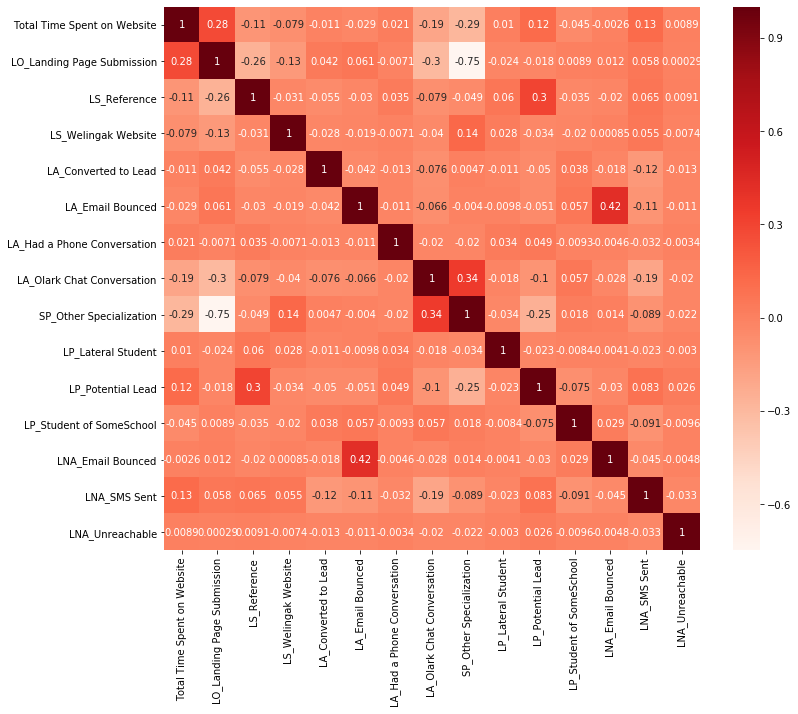

In [897]:
# Let's see the correlation matrix 
plt.figure(figsize = (12,10))        # Size of the figure
ax = sns.heatmap(lead_df[col].corr(),annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

Conclusion: From above heatmap we can see that 'LNA_Email Bounced' and 'LA_Email Bounced' are highly correlated and we can remove 'LNA_Email Bounced' for better model.

#### Removing column "LNA_Email Bounced" based on conclusion from previous heatmap of logm2 model

In [898]:
col = col.drop('LNA_Email Bounced', 1)
col

Index(['Total Time Spent on Website', 'LO_Landing Page Submission',
       'LS_Reference', 'LS_Welingak Website', 'LA_Converted to Lead',
       'LA_Email Bounced', 'LA_Had a Phone Conversation',
       'LA_Olark Chat Conversation', 'SP_Other Specialization',
       'LP_Lateral Student', 'LP_Potential Lead', 'LP_Student of SomeSchool',
       'LNA_SMS Sent', 'LNA_Unreachable'],
      dtype='object')

## 16. Logistic Regression model - logm3

In [899]:
# Building model logm3 and checking summary
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2673.2
Date:                Mon, 20 Jul 2020   Deviance:                       5346.4
Time:                        20:47:35   Pearson chi2:                 6.82e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.2555      0.119     -2.151      0.031      -0.488      -0.023
Total Time Spent on Website     0.9625      0.036     26.441      0.000       0.891       1.034
LO_Landing Page Submission     -1.3409      0.123    -10.921      0.000      -1.582      -1.100
LS_Reference                    2.3525      0.210     11.227      0.000       1.942       2.763
LS_Welingak Website             5.0331      0.729      6.907      0.000       3.605       6.461
LA_Converted to Lead           -1.1269      0.207     -5.434      0.000      -1.533      -0.720
LA_Email Bounced               -1.6655      0.284     -5.869      0.000      -2.222      -1.109
LA_Had a Phone Conversation     1.5787      0.663      2.381      0.017       0.279       2.878
LA_Olark Chat Conversation     -1.2409      0.169     -7.348      0.000      -1.572      -0.910
SP_Other Specialization        -0.8344      0.126     -6.630      0.000      -1.081      -0.588
LP_Lateral Student              2.9904      1.079      2.772      0.006       0.876       5.105
LP_Potential Lead               1.7581      0.097     18.103      0.000       1.568       1.948
LP_Student of SomeSchool       -1.5770      0.413     -3.815      0.000      -2.387      -0.767
LNA_SMS Sent                    1.5514      0.079     19.685      0.000       1.397       1.706
LNA_Unreachable                 1.3703      0.544      2.520      0.012       0.304       2.436
===============================================================================================
"""

In [900]:
# Create a dataframe that will contain the names of all the feature variables in logm3 and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,SP_Other Specialization,1.54
1,LO_Landing Page Submission,1.45
12,LNA_SMS Sent,1.41
7,LA_Olark Chat Conversation,1.34
10,LP_Potential Lead,1.34
2,LS_Reference,1.24
0,Total Time Spent on Website,1.15
4,LA_Converted to Lead,1.08
5,LA_Email Bounced,1.07
3,LS_Welingak Website,1.05


For logm3 model P-value for all features is less than 0.05 and VIF value is less than 5.

#### Checking correlation between features in logm3 model

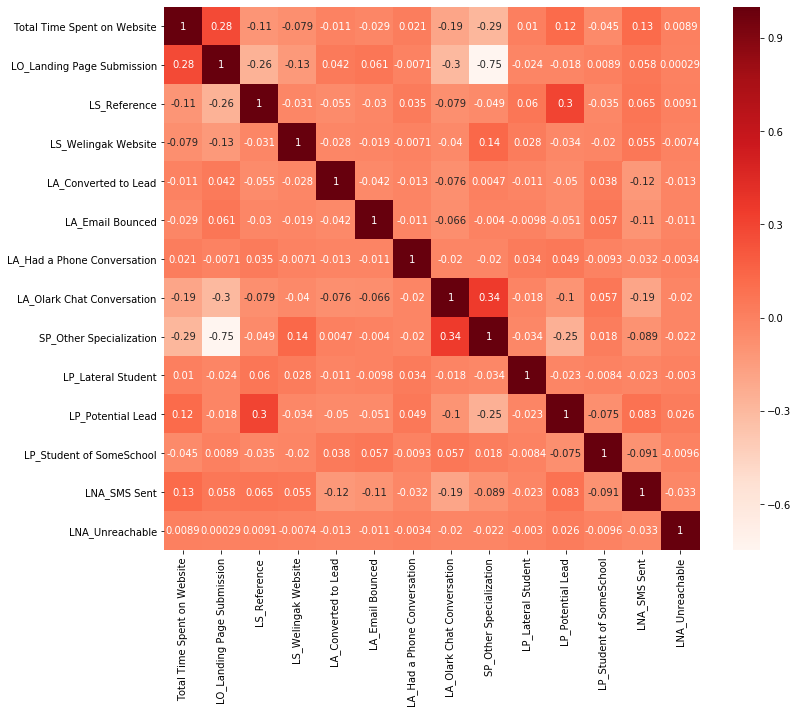

In [901]:
# Let's see the correlation matrix for features in logm3
plt.figure(figsize = (12,10))        # Size of the figure
ax = sns.heatmap(lead_df[col].corr(),annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

Conclusion: From above heatmap we can see that 'SP_Other Specialization' is strongly correlated with 'LA_Olark Chat Conversation' and 'LO_Landing Page Submission' so we will remove this column

#### Removing column "SP_Other Specialization" based on conclusion from previous heatmap in logm3 model

In [902]:
# Let's drop SP_Other Specialization since it has a high correlation with other columns
col = col.drop('SP_Other Specialization')
col

Index(['Total Time Spent on Website', 'LO_Landing Page Submission',
       'LS_Reference', 'LS_Welingak Website', 'LA_Converted to Lead',
       'LA_Email Bounced', 'LA_Had a Phone Conversation',
       'LA_Olark Chat Conversation', 'LP_Lateral Student', 'LP_Potential Lead',
       'LP_Student of SomeSchool', 'LNA_SMS Sent', 'LNA_Unreachable'],
      dtype='object')

## 17. Logistic Regression model - logm4

In [903]:
# building model logm4 and checking summary
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2695.6
Date:                Mon, 20 Jul 2020   Deviance:                       5391.2
Time:                        20:47:37   Pearson chi2:                 6.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -0.9218      0.063    -14.542      0.000      -1.046      -0.798
Total Time Spent on Website     0.9817      0.036     27.036      0.000       0.911       1.053
LO_Landing Page Submission     -0.7143      0.076     -9.403      0.000      -0.863      -0.565
LS_Reference                    2.5869      0.205     12.614      0.000       2.185       2.989
LS_Welingak Website             4.9051      0.728      6.734      0.000       3.477       6.333
LA_Converted to Lead           -1.1833      0.208     -5.691      0.000      -1.591      -0.776
LA_Email Bounced               -1.7333      0.284     -6.103      0.000      -2.290      -1.177
LA_Had a Phone Conversation     1.5826      0.665      2.382      0.017       0.280       2.885
LA_Olark Chat Conversation     -1.3036      0.165     -7.877      0.000      -1.628      -0.979
LP_Lateral Student              3.1798      1.075      2.957      0.003       1.072       5.288
LP_Potential Lead               1.9060      0.094     20.264      0.000       1.722       2.090
LP_Student of SomeSchool       -1.5798      0.414     -3.820      0.000      -2.390      -0.769
LNA_SMS Sent                    1.5354      0.079     19.537      0.000       1.381       1.689
LNA_Unreachable                 1.3941      0.538      2.591      0.010       0.340       2.449
===============================================================================================
"""

In [904]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                       Features   VIF
1    LO_Landing Page Submission  1.43
9             LP_Potential Lead  1.34
11                 LNA_SMS Sent  1.29
2                  LS_Reference  1.24
0   Total Time Spent on Website  1.13
7    LA_Olark Chat Conversation  1.06
4          LA_Converted to Lead  1.05
5              LA_Email Bounced  1.05
10     LP_Student of SomeSchool  1.04
3           LS_Welingak Website  1.02
6   LA_Had a Phone Conversation  1.01
8            LP_Lateral Student  1.01
12              LNA_Unreachable  1.01


#### Checking correlation between features in logm4 model

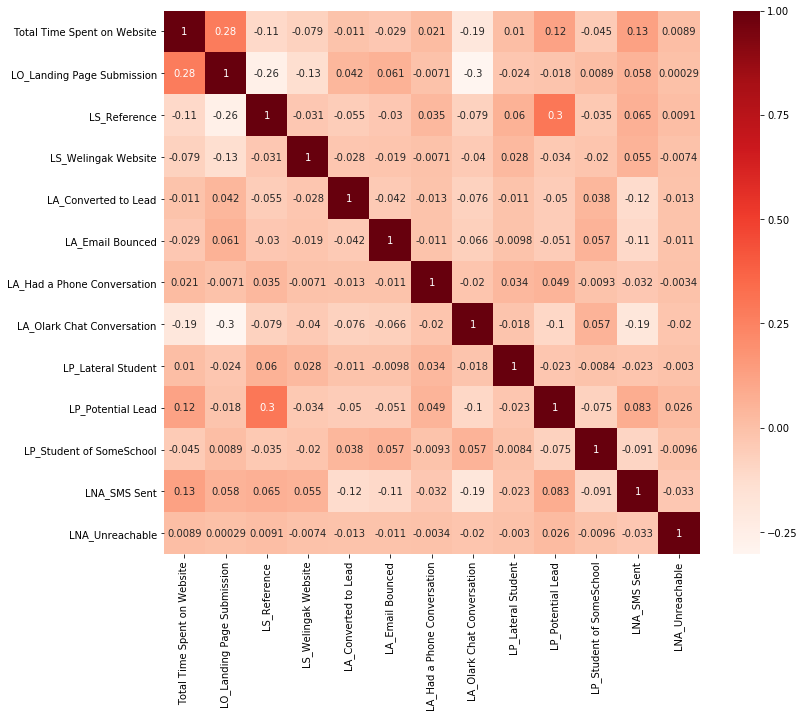

In [905]:
# Let's see the correlation matrix 
plt.figure(figsize = (12,10))        # Size of the figure
ax = sns.heatmap(lead_df[col].corr(),annot = True, cmap = 'Reds')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

Conclusion: Correlation values is good for all features now.

#### Based on P-value, VIF scores and Correlation between the features we can finalize model 'logm4' for our analysis.

## 18. Predicting values on train set

In [906]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred

1871    0.142952
6795    0.163765
3516    0.167900
8105    0.775475
3934    0.142952
          ...   
350     0.800405
79      0.981445
8039    0.142952
6936    0.036931
5640    0.142952
Length: 6468, dtype: float64

In [907]:
# Reshaping the array
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.14295216, 0.16376453, 0.16790019, 0.77547506, 0.14295216,
       0.97427077, 0.08686193, 0.99258695, 0.18088416, 0.98854599])

In [908]:
# Creating Conversion_Prob column
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [909]:
# Creating new column 'predicted' with 1 if Conversion_Prob > 0.3 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted
0,0,0.142952,1871,0
1,0,0.163765,6795,0
2,0,0.167900,3516,0
3,0,0.775475,8105,1
4,0,0.142952,3934,0


#### Checking the overall accuracy of model logm4 on assumed probability cutoff = 0.3

In [910]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7935992578849722


#### Metrics beyond accuracy

In [911]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3020  982]
 [ 353 2113]]


In [912]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Calculating Sensitivity, Specificity on assumed probability cutoff = 0.3

In [913]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.856853203568532

In [914]:
# Let us calculate specificity
TN / float(TN+FP)

0.7546226886556722

## 19. Plotting the ROC Curve - Probability cutoff assumed at 0.3

In [915]:
# Defining ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [916]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

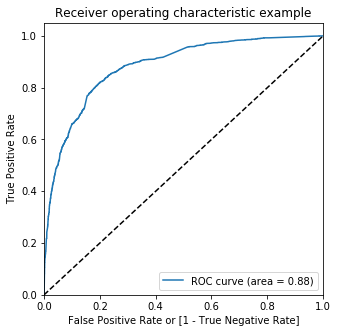

In [917]:
# Plotting the ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

## 20. Finding Optimal Cutoff Point - Tradeoff between accuracy,sensitivity and specificity for various probabilities

#### Creating different predicted columns at different probability cutoffs

In [918]:
# create columns with different probability cutoffs 
numbers = [0.0,0.1,0.2,0.3,0.38,0.39,0.4,0.41,0.42,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.38,0.39,0.4,0.41,0.42,0.5,0.6,0.7,0.8,0.9
0,0,0.142952,1871,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.163765,6795,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.167900,3516,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.775475,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.142952,3934,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0


#### Calculating accuracy, sensitivity and specificity for various probability cutoffs

In [919]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.38,0.39,0.4,0.41,0.42,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00  0.381262     1.000000     0.000000
0.10         0.10  0.599258     0.975264     0.367566
0.20         0.20  0.758040     0.897810     0.671914
0.30         0.30  0.793599     0.856853     0.754623
0.38         0.38  0.810915     0.804947     0.814593
0.39         0.39  0.812616     0.797242     0.822089
0.40         0.40  0.813080     0.789132     0.827836
0.41         0.41  0.813544     0.781833     0.833083
0.42         0.42  0.815244     0.778589     0.837831
0.50         0.50  0.805504     0.673966     0.886557
0.60         0.60  0.798392     0.595702     0.923288
0.70         0.70  0.782468     0.515815     0.946777
0.80         0.80  0.759276     0.417275     0.970015
0.90         0.90  0.713976     0.272101     0.986257


#### plotting accuracy,sensitivity and specificity for various probabilities

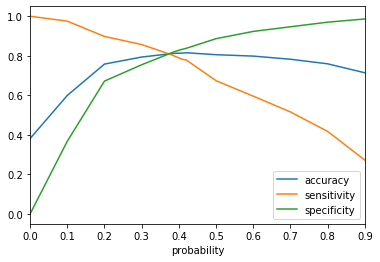

In [920]:
# To plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

#### Conclusion: From the curve above, 0.38 is the optimum point to take it as a cutoff probability.

## 21. Final Predicting values on train set with optimum probability cut off point as 0.38

In [921]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.38 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.38,0.39,0.4,0.41,0.42,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.142952,1871,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0.163765,6795,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.167900,3516,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.775475,8105,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.142952,3934,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Checking overall accuracy of final model according to optimum cutoff probability as 0.38

In [922]:
# check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8109152752009895

##  22. Calculating metrics beyond simply accuracy - Train data - Cut off 0.38

In [923]:
# Creating confusion matrix as per final predicted values according to optimum cutoff probability as 0.38
confusion_train_final = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion_train_final

array([[3260,  742],
       [ 481, 1985]], dtype=int64)

In [924]:
# confusion_train_final

# Actual/Predicted          not converted    converted
        # not converted        3260            742
        # converted             481            1985  

In [925]:
# Defining metric parameters
TP = confusion_train_final[1,1] # true positive 
TN = confusion_train_final[0,0] # true negatives
FP = confusion_train_final[0,1] # false positives
FN = confusion_train_final[1,0] # false negatives

#### Sensitivity - Recall - Train data -  With optimum probability cutoff = 0.38

In [926]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8049472830494728

#### Specificity - Train data -  With optimum probability cutoff = 0.38

In [927]:
# Let us calculate specificity
TN / float(TN+FP)

0.8145927036481759

#### False postive rate -T rain data -  With optimum probability cutoff = 0.38

In [928]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.1854072963518241


#### Precision - Positive predictive value  - Train data -  With optimum probability cutoff = 0.38

In [929]:
# Positive predictive value 
print (TP / float(TP+FP))

0.727906123945728


#### Negative predictive value - Train data -  With optimum probability cutoff = 0.38

In [930]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8714247527399092


## 23. Creating lead score variable for Lead numbers in Train Data 

In [931]:
y_train_lead_score = y_train_pred_final[['Lead Number','Converted','Conversion_Prob','final_predicted']]
y_train_lead_score.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,1871,0,0.142952,0
1,6795,0,0.163765,0
2,3516,0,0.167900,0
3,8105,0,0.775475,1
4,3934,0,0.142952,0


In [932]:
y_train_lead_score['Lead Score'] = y_train_lead_score.Conversion_Prob.map(lambda x: x*100)
y_train_lead_score['Lead Score'] = y_train_lead_score['Lead Score'].map(lambda x: round(x,2))
y_train_lead_score.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead Score
0,1871,0,0.142952,0,14.30
1,6795,0,0.163765,0,16.38
2,3516,0,0.167900,0,16.79
3,8105,0,0.775475,1,77.55
4,3934,0,0.142952,0,14.30


## 24. Finding Optimal Cutoff Point - by Precision and Recall tradeoff

#### Creating confusion matrix based on assumed probability cutoff of value 0.3

In [933]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3020,  982],
       [ 353, 2113]], dtype=int64)

#### Precision - - Assumed probability cut off 0.3

In [934]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6827140549273021

#### Recall - - Assumed probability cut off 0.3

In [935]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.856853203568532

#### Precision and recall tradeoff - Curve

In [936]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

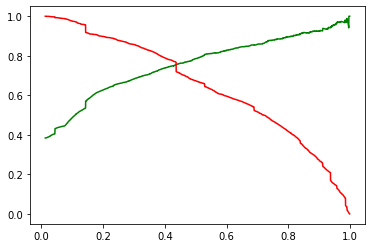

In [937]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Conclusion: From the curve above, 0.42 is the optimum point to take it as a cutoff probability.

# --------------------------------------------------------------------------------------------------------------
### Probability Cut off as per Sensitivity, Specificity and Accuracy trafeoff = 0.38
### Probability Cut off as per Precision and Recall tradeoff = 0.42
### Conclusion : As we are focusing on Sensitivity as the primary metric in this model, 0.38 probability cutoff is matching our expectation. So we will consider 0.38 as the optimum probability cutoff.
# --------------------------------------------------------------------------------------------------------------


# ------------------------------Prediction on Test dataset-----------------------------------------

## 25. Performing scaling operations on nemerical columns - (Transform only)

In [938]:
# Transforming the test data as per scaled train data
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [939]:
# Retaining columns on test data as per final trained data set
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,LO_Landing Page Submission,LS_Reference,LS_Welingak Website,LA_Converted to Lead,LA_Email Bounced,LA_Had a Phone Conversation,LA_Olark Chat Conversation,LP_Lateral Student,LP_Potential Lead,LP_Student of SomeSchool,LNA_SMS Sent,LNA_Unreachable
4269,0.964504,0,0,0,0,0,0,0,0,0,0,1,0
2376,-0.885371,0,1,0,0,0,0,0,0,0,0,1,0
7766,-0.777416,0,0,0,0,0,0,0,0,0,0,0,1
9199,-0.885371,0,0,0,0,0,0,1,0,1,0,0,0
4359,-0.885371,0,1,0,0,0,0,0,0,1,0,0,0


In [940]:
# Adding constant to test data set
X_test_sm = sm.add_constant(X_test)

In [941]:
# Making prediction on test set
y_test_pred = res.predict(X_test_sm)

In [942]:
y_test_pred[:10]

4269    0.826407
2376    0.911437
7766    0.427785
9199    0.233516
4359    0.937141
9186    0.884465
1631    0.772123
8963    0.644833
8007    0.044334
5324    0.335707
dtype: float64

In [943]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [944]:
# Let's see the head
y_pred_1.head()

,0
4269,0.826407
2376,0.911437
7766,0.427785
9199,0.233516
4359,0.937141


In [945]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [946]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [947]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [948]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [949]:
y_pred_final.head()

,Converted,Lead Number,0
0,1,4269,0.826407
1,1,2376,0.911437
2,1,7766,0.427785
3,0,9199,0.233516
4,1,4359,0.937141


In [950]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [951]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [952]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,4269,1,0.826407
1,2376,1,0.911437
2,7766,1,0.427785
3,9199,0,0.233516
4,4359,1,0.937141


#### Final predicted values on test data set by choosing probability cutoff as 0.38

In [953]:
# Cut off value selected based on Sensitivity

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,4269,1,0.826407,1
1,2376,1,0.911437,1
2,7766,1,0.427785,1
3,9199,0,0.233516,0
4,4359,1,0.937141,1


#### Checking overall accuracy of test data according to optimum cutoff probability as 0.38

In [954]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8127705627705628

##  26. Calculating metrics beyond simply accuracy - Test data - Cut off 0.38

In [955]:
confusion_test_final = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion_test_final

array([[1375,  302],
       [ 217,  878]], dtype=int64)

In [956]:
# confusion_test_final

# Actual/Predicted          not converted    converted
        # not converted        1375            302
        # converted             217            878  

In [957]:
TP = confusion_test_final[1,1] # true positive 
TN = confusion_test_final[0,0] # true negatives
FP = confusion_test_final[0,1] # false positives
FN = confusion_test_final[1,0] # false negatives

#### Sensitivity - Recall - Test data -  With optimum probability cutoff = 0.38

In [958]:
# Let's see the sensitivity of test data set
TP / float(TP+FN)

0.8018264840182648

#### Specificity - Test data -  With optimum probability cutoff = 0.38

In [959]:
# Let us calculate specificity on test data set
TN / float(TN+FP)

0.8199165175909362

#### False postive rate -Test data - With optimum probability cutoff = 0.38

In [960]:
# Calculate false postive rate - predicting Converted when customer does not have converted
print(FP/ float(TN+FP))

0.1800834824090638


#### Precision - Positive predictive value - Test data - With optimum probability cutoff = 0.38

In [961]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7440677966101695


#### Negative predictive value - Test data - With optimum probability cutoff = 0.38

In [962]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8636934673366834


## 27. Creating lead score variable for Lead numbers in Test Data 

In [963]:
y_pred_final['Lead Score'] = y_pred_final.Conversion_Prob.map(lambda x: x*100)
y_pred_final['Lead Score'] = y_pred_final['Lead Score'].map(lambda x: round(x,2))

In [964]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted,Lead Score
0,4269,1,0.826407,1,82.64
1,2376,1,0.911437,1,91.14
2,7766,1,0.427785,1,42.78
3,9199,0,0.233516,0,23.35
4,4359,1,0.937141,1,93.71


# -----------------------------------------------------------------------------------------------------------------

# Conclusions

#### Top 3 features :
#### 1. Lead Source - Welingak Website: Coefficient value for Lead Source - Welingak Website is ~4.9.
#### Variable has an extremely strong and positive impact on conversion. People coming from this source have very high chances of conversion.
#### 2. Lead Profile - Lateral Student: Coefficient value for this lead profile is – 3.18. Variable has an extremely strong and positive impact on conversion. All lateral Students who visit the website have very high chances conversion.
#### 3. Lead Source – Reference: Coefficient value for leads coming from References is 2.57.
#### Variable has a very strong and positive impact on conversion. All reference leads have a very high chance of conversion

# Recommendations :

Based on the analysis of final model that we have for this case study; sales team should segment the leads in various priorities for calling (This is in addition to overall Lead Score that our model provides):

1. Priority-1: To get priority-1 leads, sales team should first contact the leads that come from Welingak Website or are referred by someone.

2. Priority-2: To get priority-2 leads, sales team should pick the leads profiles that are ‘Lateral Students’ followed by anyone leveled as Potential Leads as second priority segment for calling.

3. Priority-3: To get priority-3 leads, sales team should pick the leads based on ‘Last Activity’ or and ‘Last Notable Activity’ features.
The last activity - ‘Had a Phone Conversation’ is among the top 5 positive coefficients. This makes a logical sense also because it shows that the lead is engaged through a conversation, sales team would have provided a lot more relevant information based in his profile and other data (That he submitted through form). Investing time in a phone conversation shows an intent of lead to opt for the course and a conversation-based engagement helps them take a positive decision

Additionally, sales team should also be considering following pointers while picking the leads for calling. This is specifically needed when business has less time and resources to reach out to leads and then want to get highest ROI. (This is in addition to overall Lead Score that our model provides)

1. If the Last Activity of lead is ‘Email Bounced’, sales team should avoid this lead in from keeping in their priority or these leads should be contacted in the end once sales team is done with priority calling

2. If Lead Profile is ‘Student of SomeSchool’, sales team should avoid this lead in from keeping in their priority or these leads should be contacted in the end once sales team is done with priority calling

3. If the Last Activity of lead is ‘Olark Chat Conversation’, sales team should probably keep all such leads for calling in the end once they are done with priority calling.

4. If the Last Activity is ‘Converted to Lead’, sales team should ensure that this lead is not picked up for calling as it is already a converted lead. Ideally all such records should be avoided from input data to sales team, however, if that is not possible, model should provide a good solution to save the sales effort here.

5. If the lead origin is ‘Landing Page Submission’, sales team should probably keep all such leads for calling in the end once they are done with priority calling.

# ---------------------------------------------End of Assignment---------------------------------------